In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [9]:
import cv2 as cv
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_RANDOM_CENTERS

In [11]:
import numpy as np
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv.kmeans(digits.data, 10, None,
                                          criteria, 10, flags)

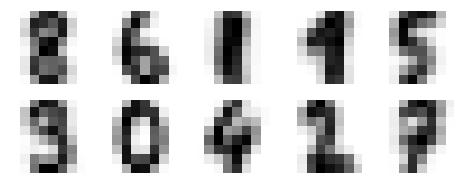

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.savefig('digits.png')

In [16]:
from scipy.stats import mode
labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7846410684474123

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, labels)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 154,  25,   0,   0,   1,   2,   0,   0,   0],
       [  1,   3, 147,  11,   0,   0,   0,   3,  12,   0],
       [  0,   1,   2, 159,   0,   2,   0,   9,  10,   0],
       [  0,  12,   0,   0, 162,   0,   0,   5,   2,   0],
       [  0,   0,   0,  40,   2, 138,   2,   0,   0,   0],
       [  1,   2,   0,   0,   0,   0, 177,   0,   1,   0],
       [  0,  14,   0,   0,   0,   0,   0, 164,   1,   0],
       [  0,  23,   3,   8,   0,   5,   1,   2, 132,   0],
       [  0,  21,   0, 145,   0,   5,   0,   8,   1,   0]], dtype=int64)